In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import tqdm.notebook as tq
from utils.crawler_utils import *

In [2]:
research_community = ['soccer','PremierLeague','Gunners','LiverpoolFC','chelseafc','MCFC','coys','reddevils']

In [25]:
bg_neg = pd.read_csv('../data/comments/author_bg/sentiment/MNC_neg_author_bg_sentiment.csv')
bg_neg.shape

bg_neg['time'] = pd.to_datetime(bg_neg['time'])

ds = bg_neg.groupby(['author','subreddit'], as_index = False).agg({'id':'count','sentiment_score':'mean'})
ds.rename(columns={'id':'cnt'},inplace=True)

ds = ds.loc[ds.subreddit.isin(research_community)]
ds['weighted_sentiment'] = ds['sentiment_score']
ds = ds.groupby('subreddit').agg({'cnt':'sum','weighted_sentiment':'mean'})
ds = ds.sort_values(by = 'cnt',ascending=False)


In [26]:
ds

,cnt,weighted_sentiment
subreddit,,
soccer,24863,0.091760
MCFC,8045,0.008909
PremierLeague,113,-0.070634
Gunners,8,-0.029969
chelseafc,2,0.000000
coys,1,-0.476700


ValueError: shape mismatch: objects cannot be broadcast to a single shape

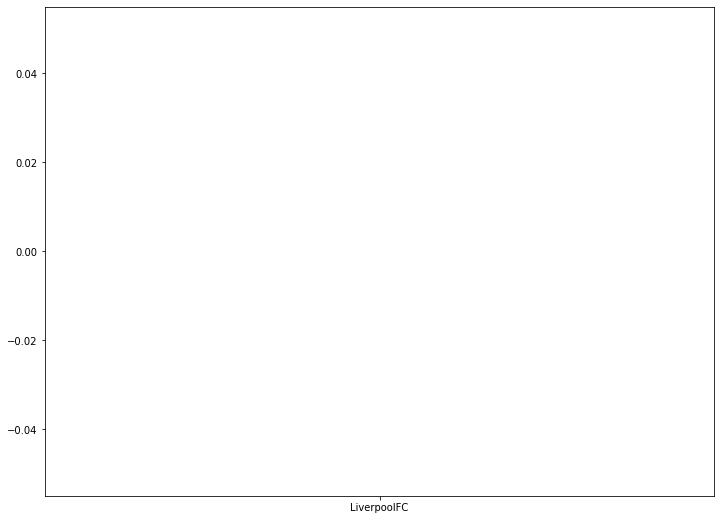

In [12]:
plt.figure(figsize = (12,9))
plt.plot()
ax = plt.gca()

ax.bar(ds.index[:10],ds.values[:10])
#ax.legend()

plt.grid(axis='y', alpha=0.75)
plt.ylabel('Num of comments')
plt.xlabel('Top subreddits')
plt.title('Subreddits Distributions of top negative authors on in r/LiverpoolFC')
plt.show()

In [7]:
ds

subreddit
LiverpoolFC      6205
soccer           2861
PremierLeague      95
Gunners            44
chelseafc          19
reddevils           5
Name: cnt, dtype: int64

In [15]:
count_club = 0
count_soccer = 0
count_all = 0
for i in tq.tqdm(range(ds.shape[0])):
    if ds.index[i] == 'LiverpoolFC':
        count_club = count_club + ds[i]
    if ds.index[i] == 'soccer':
        count_soccer = count_soccer + ds[i]
    if ds.index[i] in research_community:
        count_all = count_all + ds[i]

print("club comments proportion:",count_club/bg_neg.shape[0])
print("r/soccer comments proportion:",count_soccer/bg_neg.shape[0])
print("soccer-related communities comments proportion:",count_all/bg_neg.shape[0])


club comments proportion: 0.16267302852348994
r/soccer comments proportion: 0.07500524328859061
soccer-related communities comments proportion: 0.24195155201342283


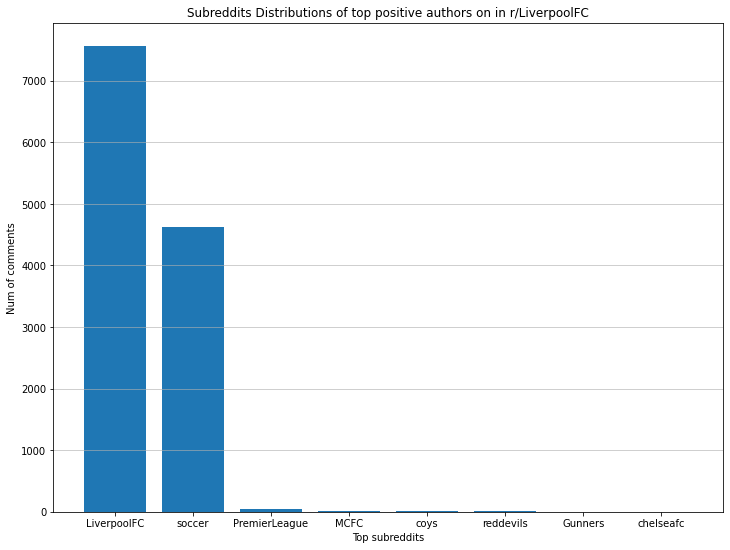

In [32]:
bg_pos = pd.read_csv('../data/comments/author_bg/LIV_pos_author_bg.csv')
bg_pos.shape

bg_pos['time'] = pd.to_datetime(bg_pos['time'])

ds = bg_pos.groupby(['author','subreddit'], as_index = False)['id'].count()
ds.rename(columns={'id':'cnt'},inplace=True)

ds = ds.loc[ds.subreddit.isin(research_community)]
ds = ds.groupby('subreddit')['cnt'].sum()
ds = ds.sort_values(ascending=False)
plt.figure(figsize = (12,9))
plt.plot()
ax = plt.gca()

ax.bar(ds.index[:10],ds.values[:10])
#ax.legend()

plt.grid(axis='y', alpha=0.75)
plt.ylabel('Num of comments')
plt.xlabel('Top subreddits')
plt.title('Subreddits Distributions of top positive authors on in r/LiverpoolFC')
plt.show()


In [19]:
count_club = 0
count_soccer = 0
count_all = 0
for i in tq.tqdm(range(ds.shape[0])):
    if ds.index[i] == 'LiverpoolFC':
        count_club = count_club + ds[i]
    if ds.index[i] == 'soccer':
        count_soccer = count_soccer + ds[i]
    if ds.index[i] in research_community:
        count_all = count_all + ds[i]

print("club comments proportion:",count_club/bg_pos.shape[0])
print("r/soccer comments proportion:",count_soccer/bg_pos.shape[0])
print("soccer-related communities comments proportion:",count_all/bg_pos.shape[0])


club comments proportion: 0.16669971140924814
r/soccer comments proportion: 0.10190998612120812
soccer-related communities comments proportion: 0.27118718745180975


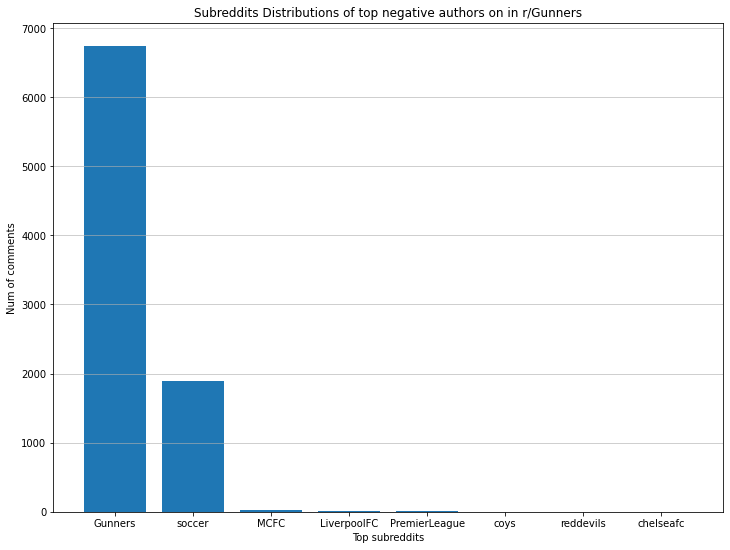


club comments proportion: 0.23170773619273466
r/soccer comments proportion: 0.06509262123242945
soccer-related communities comments proportion: 0.2987593222669004


In [23]:
bg_neg = pd.read_csv('../data/comments/author_bg/ARS_neg_author_bg.csv')
bg_neg.shape

bg_neg['time'] = pd.to_datetime(bg_neg['time'])

ds = bg_neg.groupby(['author','subreddit'], as_index = False)['id'].count()
ds.rename(columns={'id':'cnt'},inplace=True)

ds = ds.loc[ds.subreddit.isin(research_community)]
ds = ds.groupby('subreddit')['cnt'].sum()
ds = ds.sort_values(ascending=False)
plt.figure(figsize = (12,9))
plt.plot()
ax = plt.gca()

ax.bar(ds.index[:10],ds.values[:10])
#ax.legend()

plt.grid(axis='y', alpha=0.75)
plt.ylabel('Num of comments')
plt.xlabel('Top subreddits')
plt.title('Subreddits Distributions of top negative authors on in r/Gunners')
plt.show()
count_club = 0
count_soccer = 0
count_all = 0
for i in tq.tqdm(range(ds.shape[0])):
    if ds.index[i] == 'Gunners':
        count_club = count_club + ds[i]
    if ds.index[i] == 'soccer':
        count_soccer = count_soccer + ds[i]
    if ds.index[i] in research_community:
        count_all = count_all + ds[i]

print("club comments proportion:",count_club/bg_neg.shape[0])
print("r/soccer comments proportion:",count_soccer/bg_neg.shape[0])
print("soccer-related communities comments proportion:",count_all/bg_neg.shape[0])

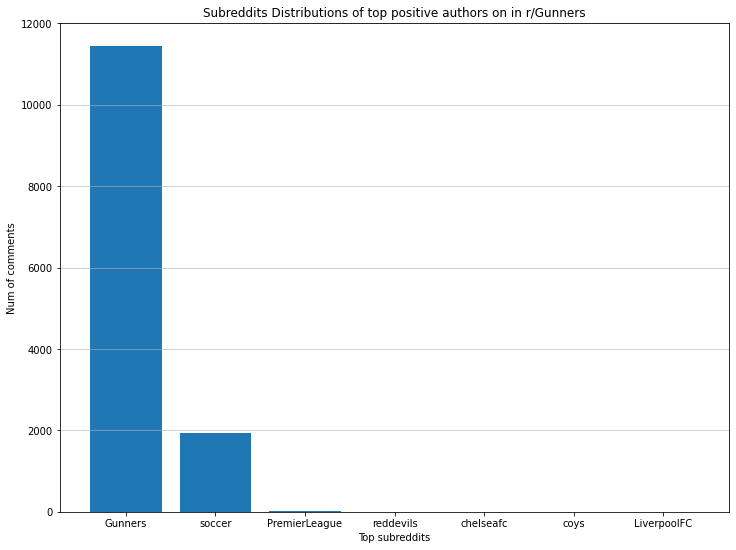


club comments proportion: 0.5124233334825625
r/soccer comments proportion: 0.08694094999328468
soccer-related communities comments proportion: 0.600438733939204


In [24]:
bg_pos = pd.read_csv('../data/comments/author_bg/ARS_pos_author_bg.csv')
bg_pos.shape

bg_pos['time'] = pd.to_datetime(bg_pos['time'])

ds = bg_pos.groupby(['author','subreddit'], as_index = False)['id'].count()
ds.rename(columns={'id':'cnt'},inplace=True)

ds = ds.loc[ds.subreddit.isin(research_community)]
ds = ds.groupby('subreddit')['cnt'].sum()
ds = ds.sort_values(ascending=False)
plt.figure(figsize = (12,9))
plt.plot()
ax = plt.gca()

ax.bar(ds.index[:10],ds.values[:10])
#ax.legend()

plt.grid(axis='y', alpha=0.75)
plt.ylabel('Num of comments')
plt.xlabel('Top subreddits')
plt.title('Subreddits Distributions of top positive authors on in r/Gunners')
plt.show()

count_club = 0
count_soccer = 0
count_all = 0
for i in tq.tqdm(range(ds.shape[0])):
    if ds.index[i] == 'Gunners':
        count_club = count_club + ds[i]
    if ds.index[i] == 'soccer':
        count_soccer = count_soccer + ds[i]
    if ds.index[i] in research_community:
        count_all = count_all + ds[i]

print("club comments proportion:",count_club/bg_pos.shape[0])
print("r/soccer comments proportion:",count_soccer/bg_pos.shape[0])
print("soccer-related communities comments proportion:",count_all/bg_pos.shape[0])

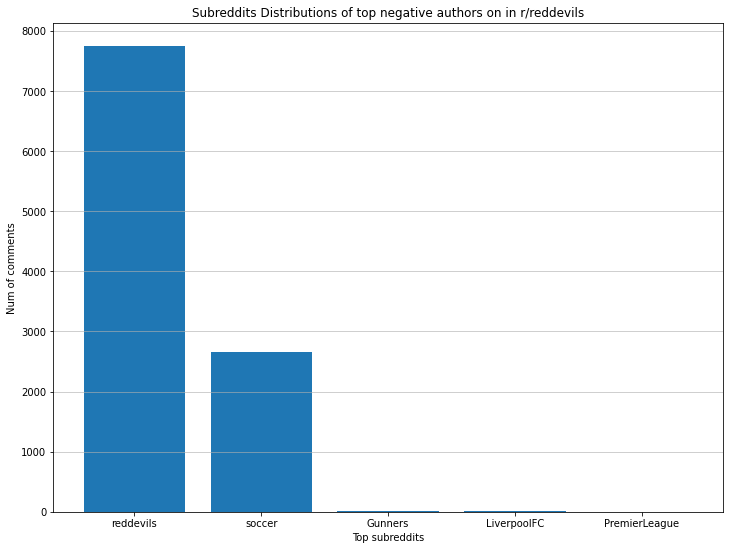


club comments proportion: 0.2350960225721307
r/soccer comments proportion: 0.08061041837322896
soccer-related communities comments proportion: 0.31622220199629864


In [16]:
bg_neg = pd.read_csv('../data/comments/author_bg/MNU_neg_author_bg.csv',lineterminator="\n")
bg_neg.shape

bg_neg['time'] = pd.to_datetime(bg_neg['time'])

ds = bg_neg.groupby(['author','subreddit'], as_index = False)['id'].count()
ds.rename(columns={'id':'cnt'},inplace=True)

ds = ds.loc[ds.subreddit.isin(research_community)]
ds = ds.groupby('subreddit')['cnt'].sum()
ds = ds.sort_values(ascending=False)
plt.figure(figsize = (12,9))
plt.plot()
ax = plt.gca()

ax.bar(ds.index[:10],ds.values[:10])
#ax.legend()

plt.grid(axis='y', alpha=0.75)
plt.ylabel('Num of comments')
plt.xlabel('Top subreddits')
plt.title('Subreddits Distributions of top negative authors on in r/reddevils')
plt.show()
count_club = 0
count_soccer = 0
count_all = 0
for i in tq.tqdm(range(ds.shape[0])):
    if ds.index[i] == 'reddevils':
        count_club = count_club + ds[i]
    if ds.index[i] == 'soccer':
        count_soccer = count_soccer + ds[i]
    if ds.index[i] in research_community:
        count_all = count_all + ds[i]

print("club comments proportion:",count_club/bg_neg.shape[0])
print("r/soccer comments proportion:",count_soccer/bg_neg.shape[0])
print("soccer-related communities comments proportion:",count_all/bg_neg.shape[0])

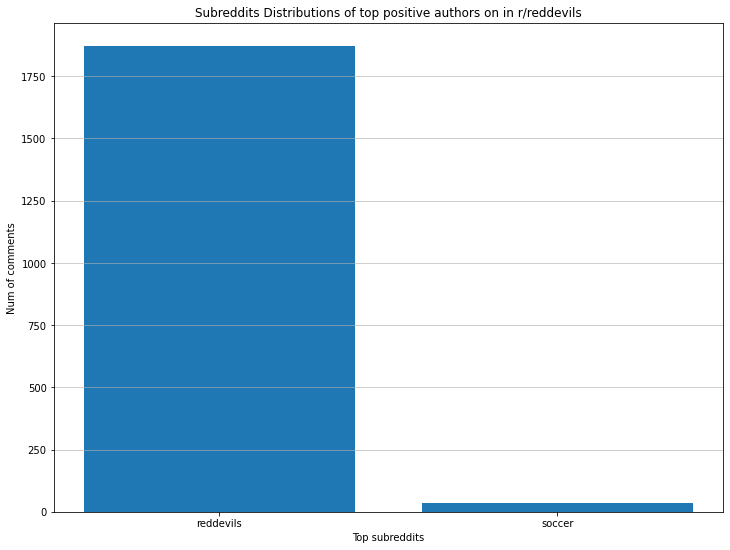


club comments proportion: 0.5373134328358209
r/soccer comments proportion: 0.010619977037887486
soccer-related communities comments proportion: 0.5479334098737084


In [15]:
bg_pos = pd.read_csv('../data/comments/author_bg/MNU_pos_author_bg.csv')
bg_pos.shape

bg_pos['time'] = pd.to_datetime(bg_pos['time'])

ds = bg_pos.groupby(['author','subreddit'], as_index = False)['id'].count()
ds.rename(columns={'id':'cnt'},inplace=True)

ds = ds.loc[ds.subreddit.isin(research_community)]
ds = ds.groupby('subreddit')['cnt'].sum()
ds = ds.sort_values(ascending=False)
plt.figure(figsize = (12,9))
plt.plot()
ax = plt.gca()

ax.bar(ds.index[:10],ds.values[:10])
#ax.legend()

plt.grid(axis='y', alpha=0.75)
plt.ylabel('Num of comments')
plt.xlabel('Top subreddits')
plt.title('Subreddits Distributions of top positive authors on in r/reddevils')
plt.show()

count_club = 0
count_soccer = 0
count_all = 0
for i in tq.tqdm(range(ds.shape[0])):
    if ds.index[i] == 'reddevils':
        count_club = count_club + ds[i]
    if ds.index[i] == 'soccer':
        count_soccer = count_soccer + ds[i]
    if ds.index[i] in research_community:
        count_all = count_all + ds[i]

print("club comments proportion:",count_club/bg_pos.shape[0])
print("r/soccer comments proportion:",count_soccer/bg_pos.shape[0])
print("soccer-related communities comments proportion:",count_all/bg_pos.shape[0])

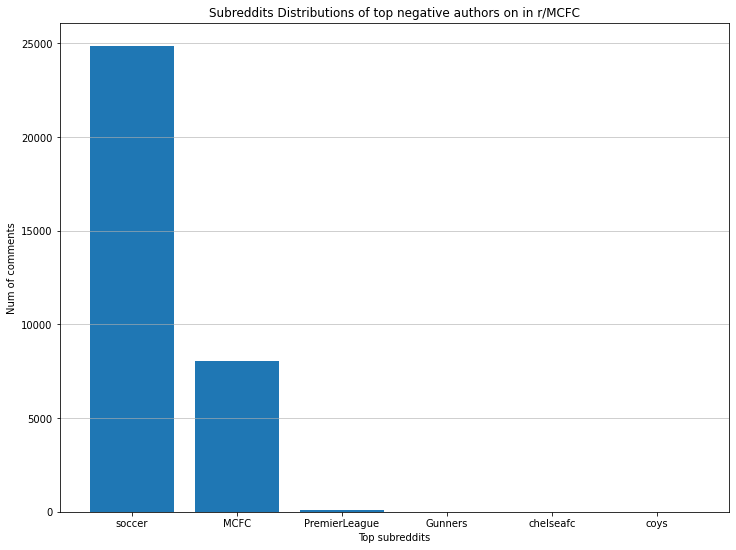


club comments proportion: 0.12307056861815234
r/soccer comments proportion: 0.38034848322599396
soccer-related communities comments proportion: 0.5053159754623752


In [17]:
bg_neg = pd.read_csv('../data/comments/author_bg/MNC_neg_author_bg.csv',lineterminator="\n")
bg_neg.shape

bg_neg['time'] = pd.to_datetime(bg_neg['time'])

ds = bg_neg.groupby(['author','subreddit'], as_index = False)['id'].count()
ds.rename(columns={'id':'cnt'},inplace=True)

ds = ds.loc[ds.subreddit.isin(research_community)]
ds = ds.groupby('subreddit')['cnt'].sum()
ds = ds.sort_values(ascending=False)
plt.figure(figsize = (12,9))
plt.plot()
ax = plt.gca()

ax.bar(ds.index[:10],ds.values[:10])
#ax.legend()

plt.grid(axis='y', alpha=0.75)
plt.ylabel('Num of comments')
plt.xlabel('Top subreddits')
plt.title('Subreddits Distributions of top negative authors on in r/MCFC')
plt.show()
count_club = 0
count_soccer = 0
count_all = 0
for i in tq.tqdm(range(ds.shape[0])):
    if ds.index[i] == 'MCFC':
        count_club = count_club + ds[i]
    if ds.index[i] == 'soccer':
        count_soccer = count_soccer + ds[i]
    if ds.index[i] in research_community:
        count_all = count_all + ds[i]

print("club comments proportion:",count_club/bg_neg.shape[0])
print("r/soccer comments proportion:",count_soccer/bg_neg.shape[0])
print("soccer-related communities comments proportion:",count_all/bg_neg.shape[0])

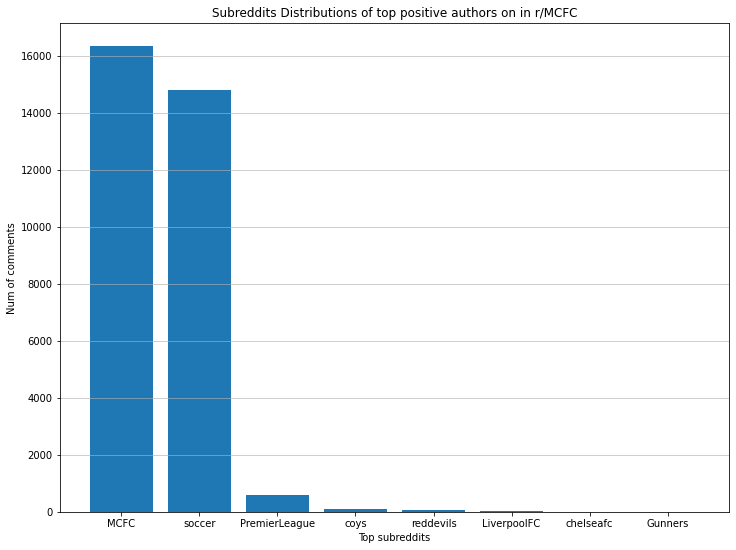


club comments proportion: 0.2702474830134405
r/soccer comments proportion: 0.2443584784010316
soccer-related communities comments proportion: 0.5274347402006977


In [18]:
bg_pos = pd.read_csv('../data/comments/author_bg/MNC_pos_author_bg.csv')
bg_pos.shape

bg_pos['time'] = pd.to_datetime(bg_pos['time'])

ds = bg_pos.groupby(['author','subreddit'], as_index = False)['id'].count()
ds.rename(columns={'id':'cnt'},inplace=True)

ds = ds.loc[ds.subreddit.isin(research_community)]
ds = ds.groupby('subreddit')['cnt'].sum()
ds = ds.sort_values(ascending=False)
plt.figure(figsize = (12,9))
plt.plot()
ax = plt.gca()

ax.bar(ds.index[:10],ds.values[:10])
#ax.legend()

plt.grid(axis='y', alpha=0.75)
plt.ylabel('Num of comments')
plt.xlabel('Top subreddits')
plt.title('Subreddits Distributions of top positive authors on in r/MCFC')
plt.show()

count_club = 0
count_soccer = 0
count_all = 0
for i in tq.tqdm(range(ds.shape[0])):
    if ds.index[i] == 'MCFC':
        count_club = count_club + ds[i]
    if ds.index[i] == 'soccer':
        count_soccer = count_soccer + ds[i]
    if ds.index[i] in research_community:
        count_all = count_all + ds[i]

print("club comments proportion:",count_club/bg_pos.shape[0])
print("r/soccer comments proportion:",count_soccer/bg_pos.shape[0])
print("soccer-related communities comments proportion:",count_all/bg_pos.shape[0])

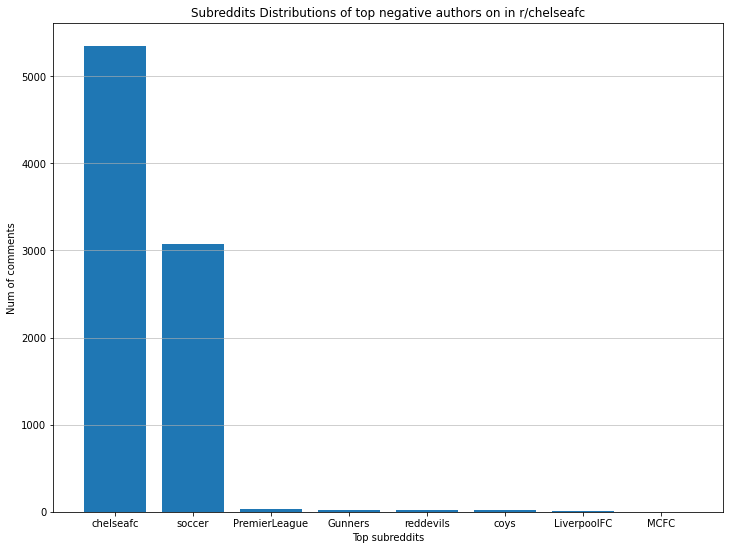


club comments proportion: 0.13950031295639473
r/soccer comments proportion: 0.080142916753599
soccer-related communities comments proportion: 0.22193824327143752


In [20]:
bg_neg = pd.read_csv('../data/comments/author_bg/CHE_neg_author_bg.csv',lineterminator="\n")
bg_neg.shape

bg_neg['time'] = pd.to_datetime(bg_neg['time'])

ds = bg_neg.groupby(['author','subreddit'], as_index = False)['id'].count()
ds.rename(columns={'id':'cnt'},inplace=True)

ds = ds.loc[ds.subreddit.isin(research_community)]
ds = ds.groupby('subreddit')['cnt'].sum()
ds = ds.sort_values(ascending=False)
plt.figure(figsize = (12,9))
plt.plot()
ax = plt.gca()

ax.bar(ds.index[:10],ds.values[:10])
#ax.legend()

plt.grid(axis='y', alpha=0.75)
plt.ylabel('Num of comments')
plt.xlabel('Top subreddits')
plt.title('Subreddits Distributions of top negative authors on in r/chelseafc')
plt.show()
count_club = 0
count_soccer = 0
count_all = 0
for i in tq.tqdm(range(ds.shape[0])):
    if ds.index[i] == 'chelseafc':
        count_club = count_club + ds[i]
    if ds.index[i] == 'soccer':
        count_soccer = count_soccer + ds[i]
    if ds.index[i] in research_community:
        count_all = count_all + ds[i]

print("club comments proportion:",count_club/bg_neg.shape[0])
print("r/soccer comments proportion:",count_soccer/bg_neg.shape[0])
print("soccer-related communities comments proportion:",count_all/bg_neg.shape[0])

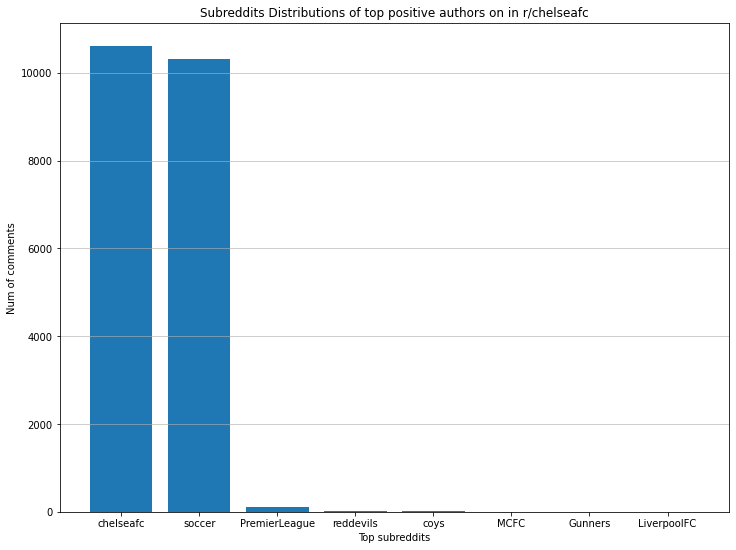


club comments proportion: 0.2866983629585607
r/soccer comments proportion: 0.27891836403911613
soccer-related communities comments proportion: 0.5696147819979469


In [21]:
bg_pos = pd.read_csv('../data/comments/author_bg/CHE_pos_author_bg.csv')
bg_pos.shape

bg_pos['time'] = pd.to_datetime(bg_pos['time'])

ds = bg_pos.groupby(['author','subreddit'], as_index = False)['id'].count()
ds.rename(columns={'id':'cnt'},inplace=True)

ds = ds.loc[ds.subreddit.isin(research_community)]
ds = ds.groupby('subreddit')['cnt'].sum()
ds = ds.sort_values(ascending=False)
plt.figure(figsize = (12,9))
plt.plot()
ax = plt.gca()

ax.bar(ds.index[:10],ds.values[:10])
#ax.legend()

plt.grid(axis='y', alpha=0.75)
plt.ylabel('Num of comments')
plt.xlabel('Top subreddits')
plt.title('Subreddits Distributions of top positive authors on in r/chelseafc')
plt.show()

count_club = 0
count_soccer = 0
count_all = 0
for i in tq.tqdm(range(ds.shape[0])):
    if ds.index[i] == 'chelseafc':
        count_club = count_club + ds[i]
    if ds.index[i] == 'soccer':
        count_soccer = count_soccer + ds[i]
    if ds.index[i] in research_community:
        count_all = count_all + ds[i]

print("club comments proportion:",count_club/bg_pos.shape[0])
print("r/soccer comments proportion:",count_soccer/bg_pos.shape[0])
print("soccer-related communities comments proportion:",count_all/bg_pos.shape[0])

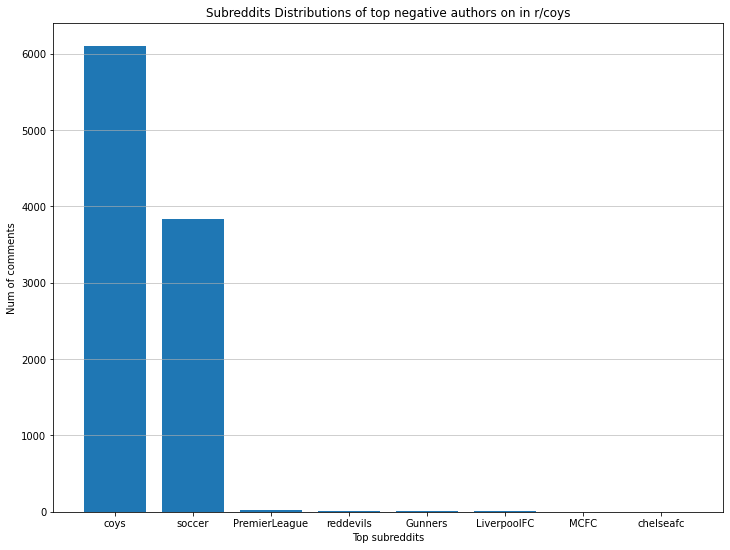


club comments proportion: 0.2391704888470736
r/soccer comments proportion: 0.1504174997059861
soccer-related communities comments proportion: 0.3915872829197538


In [30]:
bg_neg = pd.read_csv('../data/comments/author_bg/TOT_neg_author_bg.csv',lineterminator="\n")
bg_neg.shape

bg_neg['time'] = pd.to_datetime(bg_neg['time'])

ds = bg_neg.groupby(['author','subreddit'], as_index = False)['id'].count()
ds.rename(columns={'id':'cnt'},inplace=True)

ds = ds.loc[ds.subreddit.isin(research_community)]
ds = ds.groupby('subreddit')['cnt'].sum()
ds = ds.sort_values(ascending=False)
plt.figure(figsize = (12,9))
plt.plot()
ax = plt.gca()

ax.bar(ds.index[:10],ds.values[:10])
#ax.legend()

plt.grid(axis='y', alpha=0.75)
plt.ylabel('Num of comments')
plt.xlabel('Top subreddits')
plt.title('Subreddits Distributions of top negative authors on in r/coys')
plt.show()
count_club = 0
count_soccer = 0
count_all = 0
for i in tq.tqdm(range(ds.shape[0])):
    if ds.index[i] == 'coys':
        count_club = count_club + ds[i]
    if ds.index[i] == 'soccer':
        count_soccer = count_soccer + ds[i]
    if ds.index[i] in research_community:
        count_all = count_all + ds[i]

print("club comments proportion:",count_club/bg_neg.shape[0])
print("r/soccer comments proportion:",count_soccer/bg_neg.shape[0])
print("soccer-related communities comments proportion:",count_all/bg_neg.shape[0])

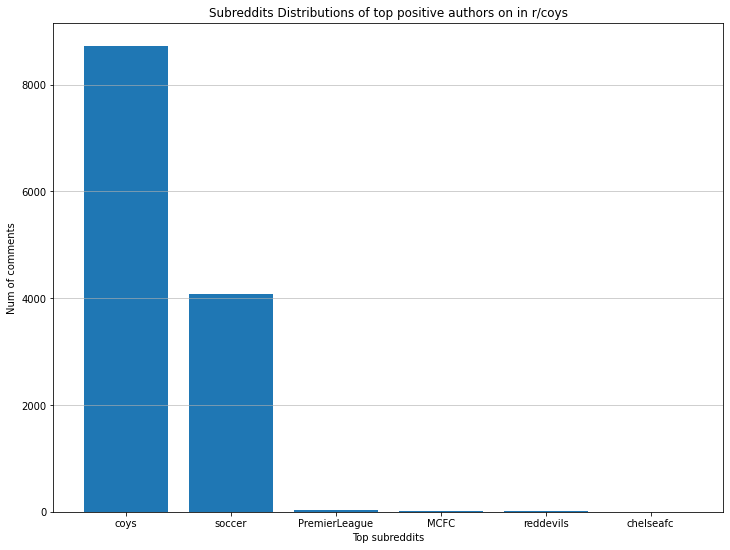


club comments proportion: 0.24134974415710136
r/soccer comments proportion: 0.11290277969852026
soccer-related communities comments proportion: 0.35596736274374224


In [31]:
bg_pos = pd.read_csv('../data/comments/author_bg/TOT_pos_author_bg.csv')
bg_pos.shape

bg_pos['time'] = pd.to_datetime(bg_pos['time'])

ds = bg_pos.groupby(['author','subreddit'], as_index = False)['id'].count()
ds.rename(columns={'id':'cnt'},inplace=True)

ds = ds.loc[ds.subreddit.isin(research_community)]
ds = ds.groupby('subreddit')['cnt'].sum()
ds = ds.sort_values(ascending=False)
plt.figure(figsize = (12,9))
plt.plot()
ax = plt.gca()

ax.bar(ds.index[:10],ds.values[:10])
#ax.legend()

plt.grid(axis='y', alpha=0.75)
plt.ylabel('Num of comments')
plt.xlabel('Top subreddits')
plt.title('Subreddits Distributions of top positive authors on in r/coys')
plt.show()

count_club = 0
count_soccer = 0
count_all = 0
for i in tq.tqdm(range(ds.shape[0])):
    if ds.index[i] == 'coys':
        count_club = count_club + ds[i]
    if ds.index[i] == 'soccer':
        count_soccer = count_soccer + ds[i]
    if ds.index[i] in research_community:
        count_all = count_all + ds[i]

print("club comments proportion:",count_club/bg_pos.shape[0])
print("r/soccer comments proportion:",count_soccer/bg_pos.shape[0])
print("soccer-related communities comments proportion:",count_all/bg_pos.shape[0])